# Project 3

## Group Members:
- Eli Weiss
- Omar Hussein
- Julian Ruggiero

# Introduction

A diamond's cut determines how much light the stone reflects. A diamond may have great color, clarity, and size, but if the cut is poor it will be dull and lifeless. Conversely, a diamond with a great cut will emanate sparkle and allure. In this project we will predict the diamond cut based on several categorical explanatory variables that describe different aspects of diamonds.

__Workflow__ <br>
__1)__ Data Profiling <br>
__2)__ Exploratory Data Analysis <br>
__3)__ Data Preparation <br>
__4)__ Prepped Data Review <br>
__5)__ Modeling <br>
__6)__ Select Models <br>
__7)__ Conclusions <br>

# Data Profiling

We will use a Decision Tree, Random Forest, Gradient Boosting Classifier, Stochastic Gradient Descent Classifier, and an XGBoost Classifier to try and predict the cut of a diamond. The data set contains 53940 observations and 10 attributes. More information about the data can be found at: [Link](https://ggplot2.tidyverse.org/reference/diamonds.html) <br>

__1)__  __price__ price in US dollars (`$326`-`$18,823`)
<br>__2)__  __carat__ weight of the diamond (0.2--5.01)
<br>__3)__  __cut__ quality of the cut (Fair, Good, Very Good, Premium, Ideal)
<br>__4)__  __color__ diamond colour, from D (best) to J (worst)
<br>__5)__  __clarity__ a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
<br>__6)__  __x__ length in mm (0--10.74)
<br>__7)__  __y__ width in mm (0--58.9)
<br>__8)__  __z__ depth in mm (0--31.8)
<br>__9)__  __depth__ total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
<br>__10)__  __table__ width of top of diamond relative to widest point (43--95)

# Exploratory Data Analysis

In [1]:
# importing libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from yellowbrick.classifier import ConfusionMatrix
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
import os
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import pydotplus
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
import xgboost as xgb

# styling matplotlib graphs
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,4)

C:\Users\julir\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\julir\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\julir\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\julir\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() 

In [2]:
#loading the data set
df = pd.read_csv("https://raw.githubusercontent.com/enwweiss/DAV-6150/master/Project3_Data.csv")

#sanity check
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Add meaningful column names to x, y and z.

In [3]:
df = df.rename(columns={'x': 'length', 'y': 'width', 'depth': 'depth_percentage', 'z': 'depth'})

In [4]:
#checking data types on raw data and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carat             53940 non-null  float64
 1   cut               53940 non-null  object 
 2   color             53940 non-null  object 
 3   clarity           53940 non-null  object 
 4   depth_percentage  53940 non-null  float64
 5   table             53940 non-null  float64
 6   price             53940 non-null  int64  
 7   length            53940 non-null  float64
 8   width             53940 non-null  float64
 9   depth             53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


We can see that we have around 54,000 diamonds and there are no null values in the columns.

In [5]:
#get response counts and percentages
df_response = df.cut.value_counts().to_frame('occurences')
df_response['%_occurences'] = df_response.occurences / df.shape[0]
df_response

,occurences,%_occurences
Ideal,21551,0.399537
Premium,13791,0.255673
Very Good,12082,0.223990
Good,4906,0.090953
Fair,1610,0.029848


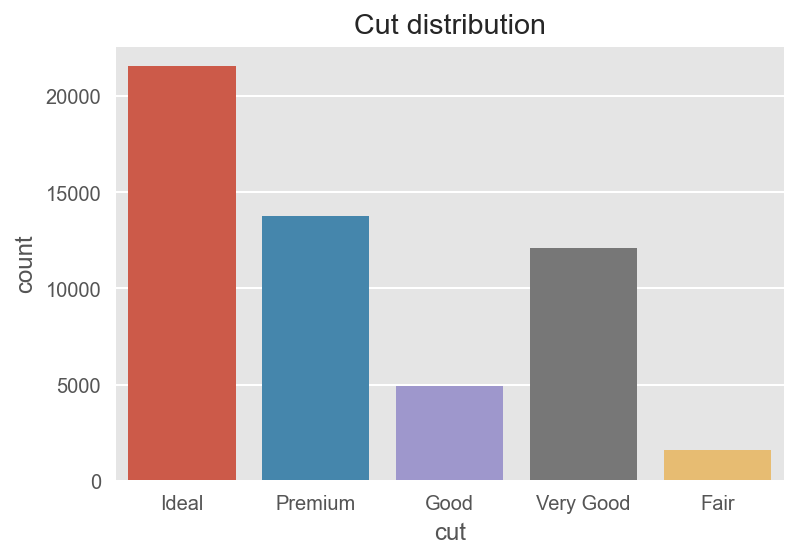

In [6]:
sns.countplot(x = 'cut', data = df).set_title("Cut distribution");

We can see that we have an imbalance response variable with 'Ideal' being the most frequent diamond cut class. We have a null error rate of almost 40%. <br>
Next we will create a list with the categorical attributes and a list numeric attributes. After that we perform EDA on both feature types.

In [7]:
columns = df.columns.to_list()
catergorical = ['color', 'clarity']
numeric = ['carat','depth_percentage', 'table', 'price', 'length', 'width', 'depth']

### Categorical EDA

We create plots of the color and the clarity vs the response. We will provide appropriate order so the 'x' axis will go from the worst class to the best on both cases.

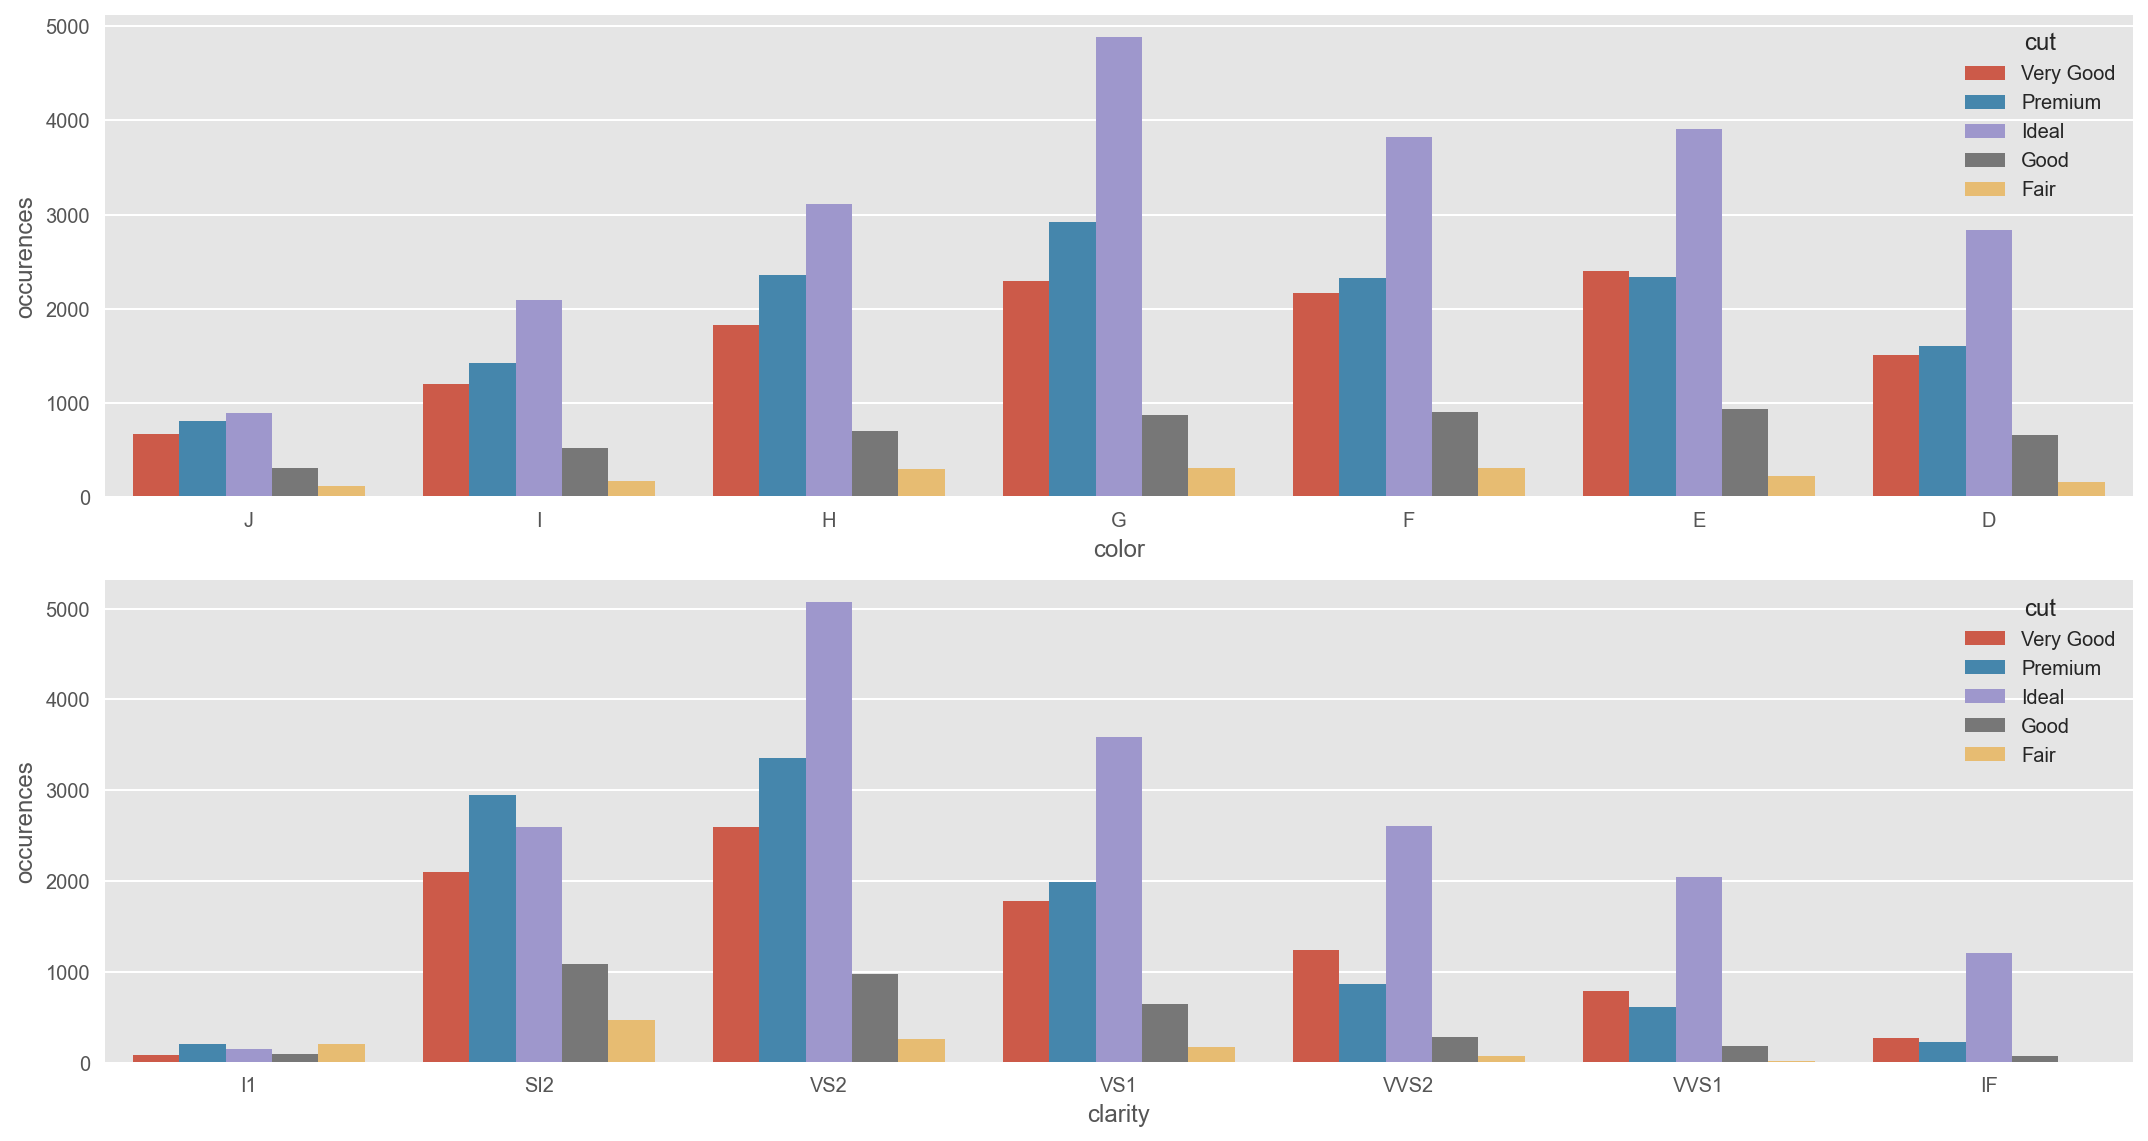

In [8]:
#define a figure to which we will add histogram of each attribute.
plt.figure(figsize=(15,8))

#use an index to identify the spot of the subplot
j = 1

order=[]
order_color=['J','I','H','G','F','E','D'] #D (best) to J (worst)
order_clarity = ['I1','SI2','VS2','VS1','VVS2','VVS1','IF'] # (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))


# Columns
for k in catergorical: #for each numeric column in the dataframe
    if k == 'color':
        order = order_color
    if k == 'clarity':
        order = order_clarity
        
    plt.subplot(2,1,j)
    dt = df.groupby([k,'cut']).size().to_frame('occurences').reset_index().sort_values(by='cut', ascending=False)
    sns.barplot(x=k, y='occurences', hue='cut', data=dt, order=order)
    j = j + 1 #add 1 to go to the next subplot space

#show results
plt.tight_layout()
plt.show();

There seems to be a pattern on both color and clarity with the response. For color, the distribution of 'Very good', 'Premium' and 'Ideal' cuts are evenly distributed for the worst color 'J', while for the rest ‘Ideal’ seems to be the dominant cut. A similar distribute can be found in the ‘Clarity’ attribute.<br><br>
Both predictors look like they will be helpful for predicting our response variable ‘Cut.’

### Numeric EDA

We will plot the numeric attributes to see correlations between each one of them. After this we will seek to identify collinearity if there is any. Then we will incorporate the response after some data cleaning, so we will have an ordinal categorical data to compare to the numeric attributes.

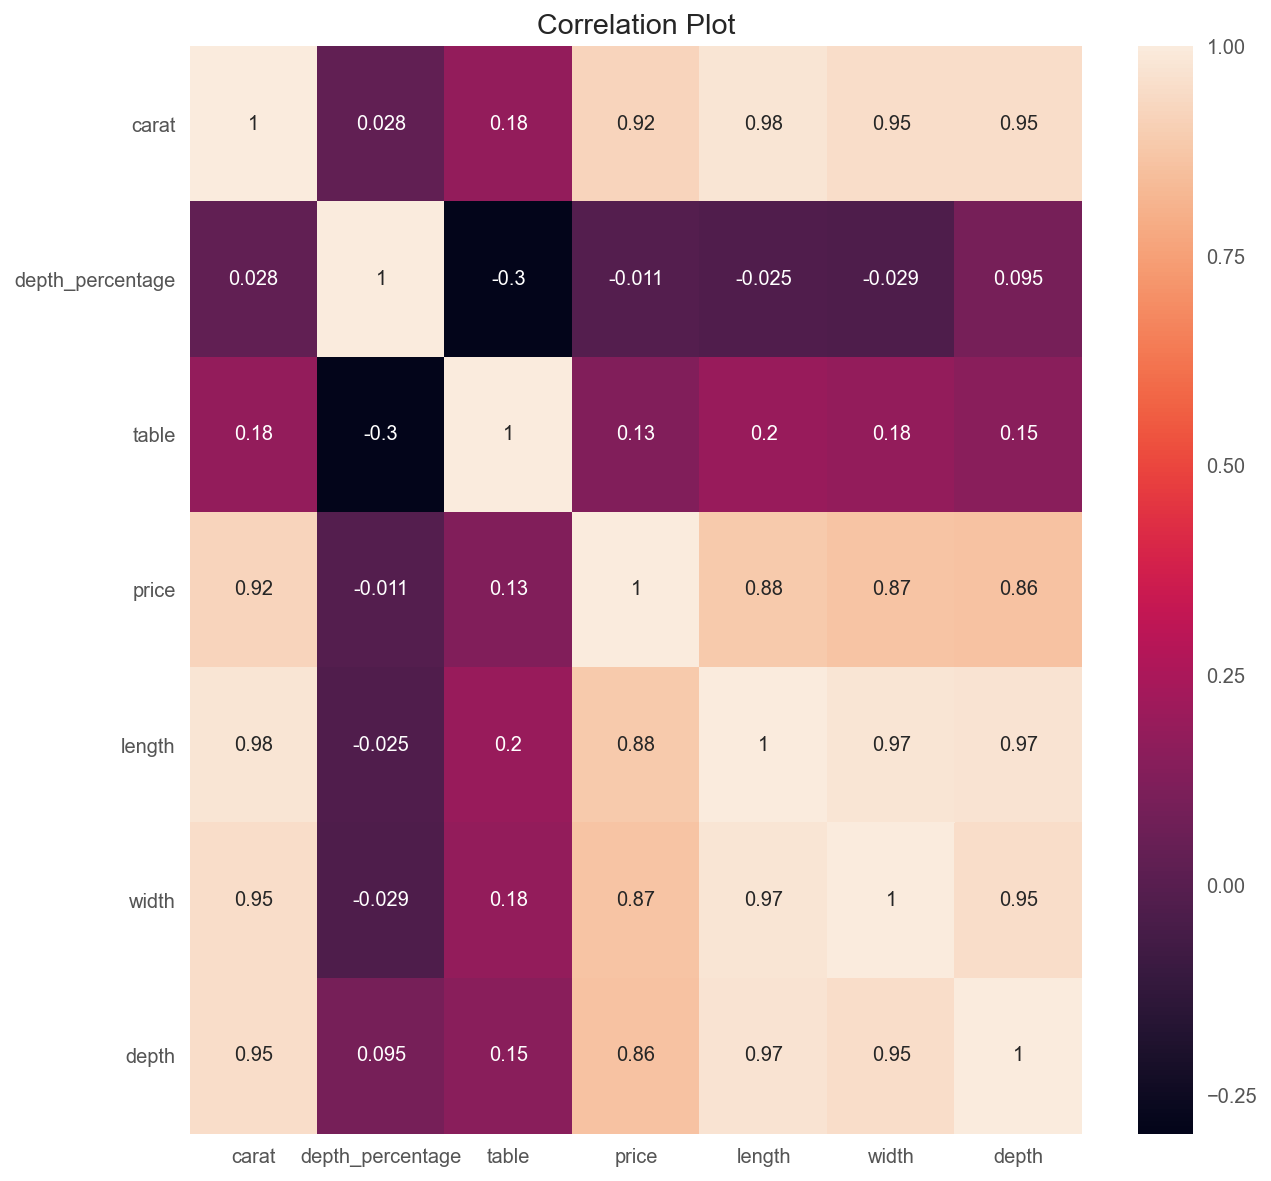

In [9]:
# initial correlation
cor = df.corr()
plt.figure(figsize=(10,10))
plt.title("Correlation Plot")
sns.heatmap(cor,annot=True)
plt.show()

There seems to be strong collinearity between carat and price, length, width and depth so we will include only one of these 4 features in our models.

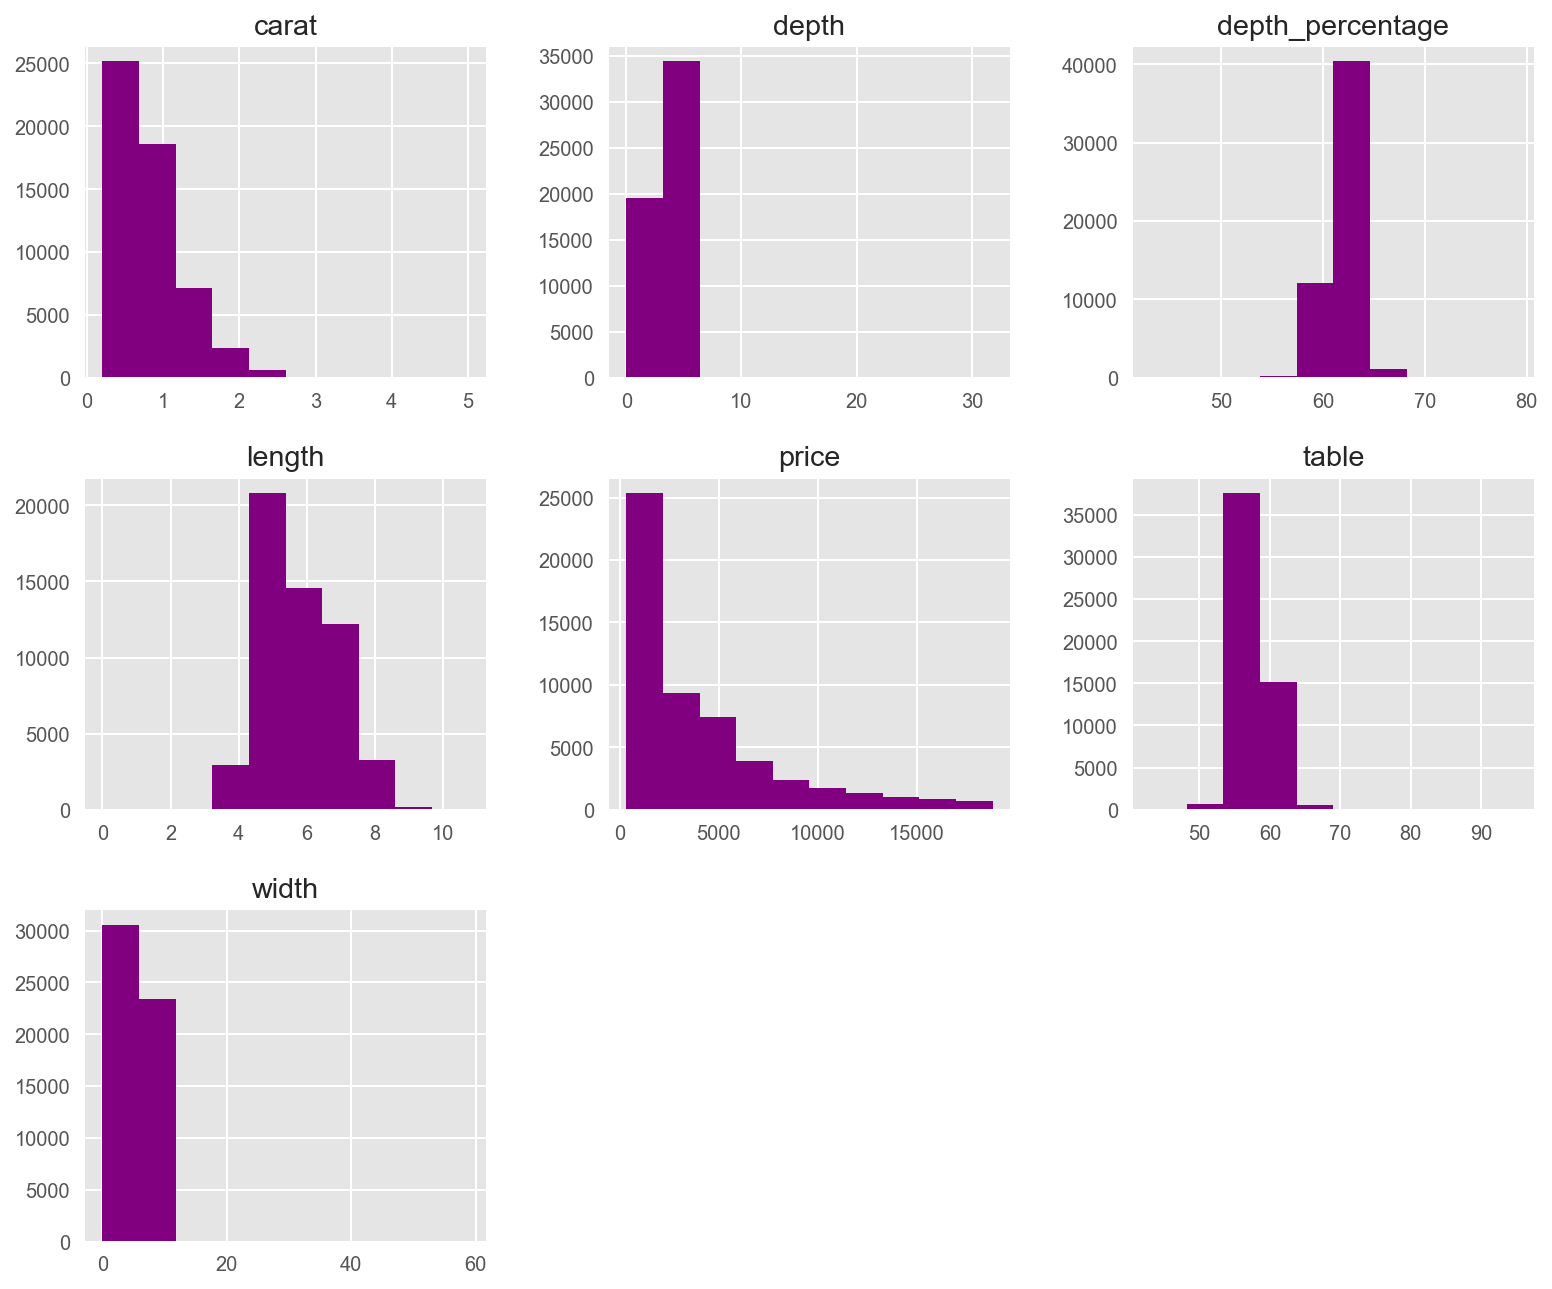

In [10]:
df[numeric].hist(figsize=(13, 11), color='purple');
plt.show();

We see some right skewed data for carat, price and length. Next we identify outliers and plot the numeric attributes vs the response.

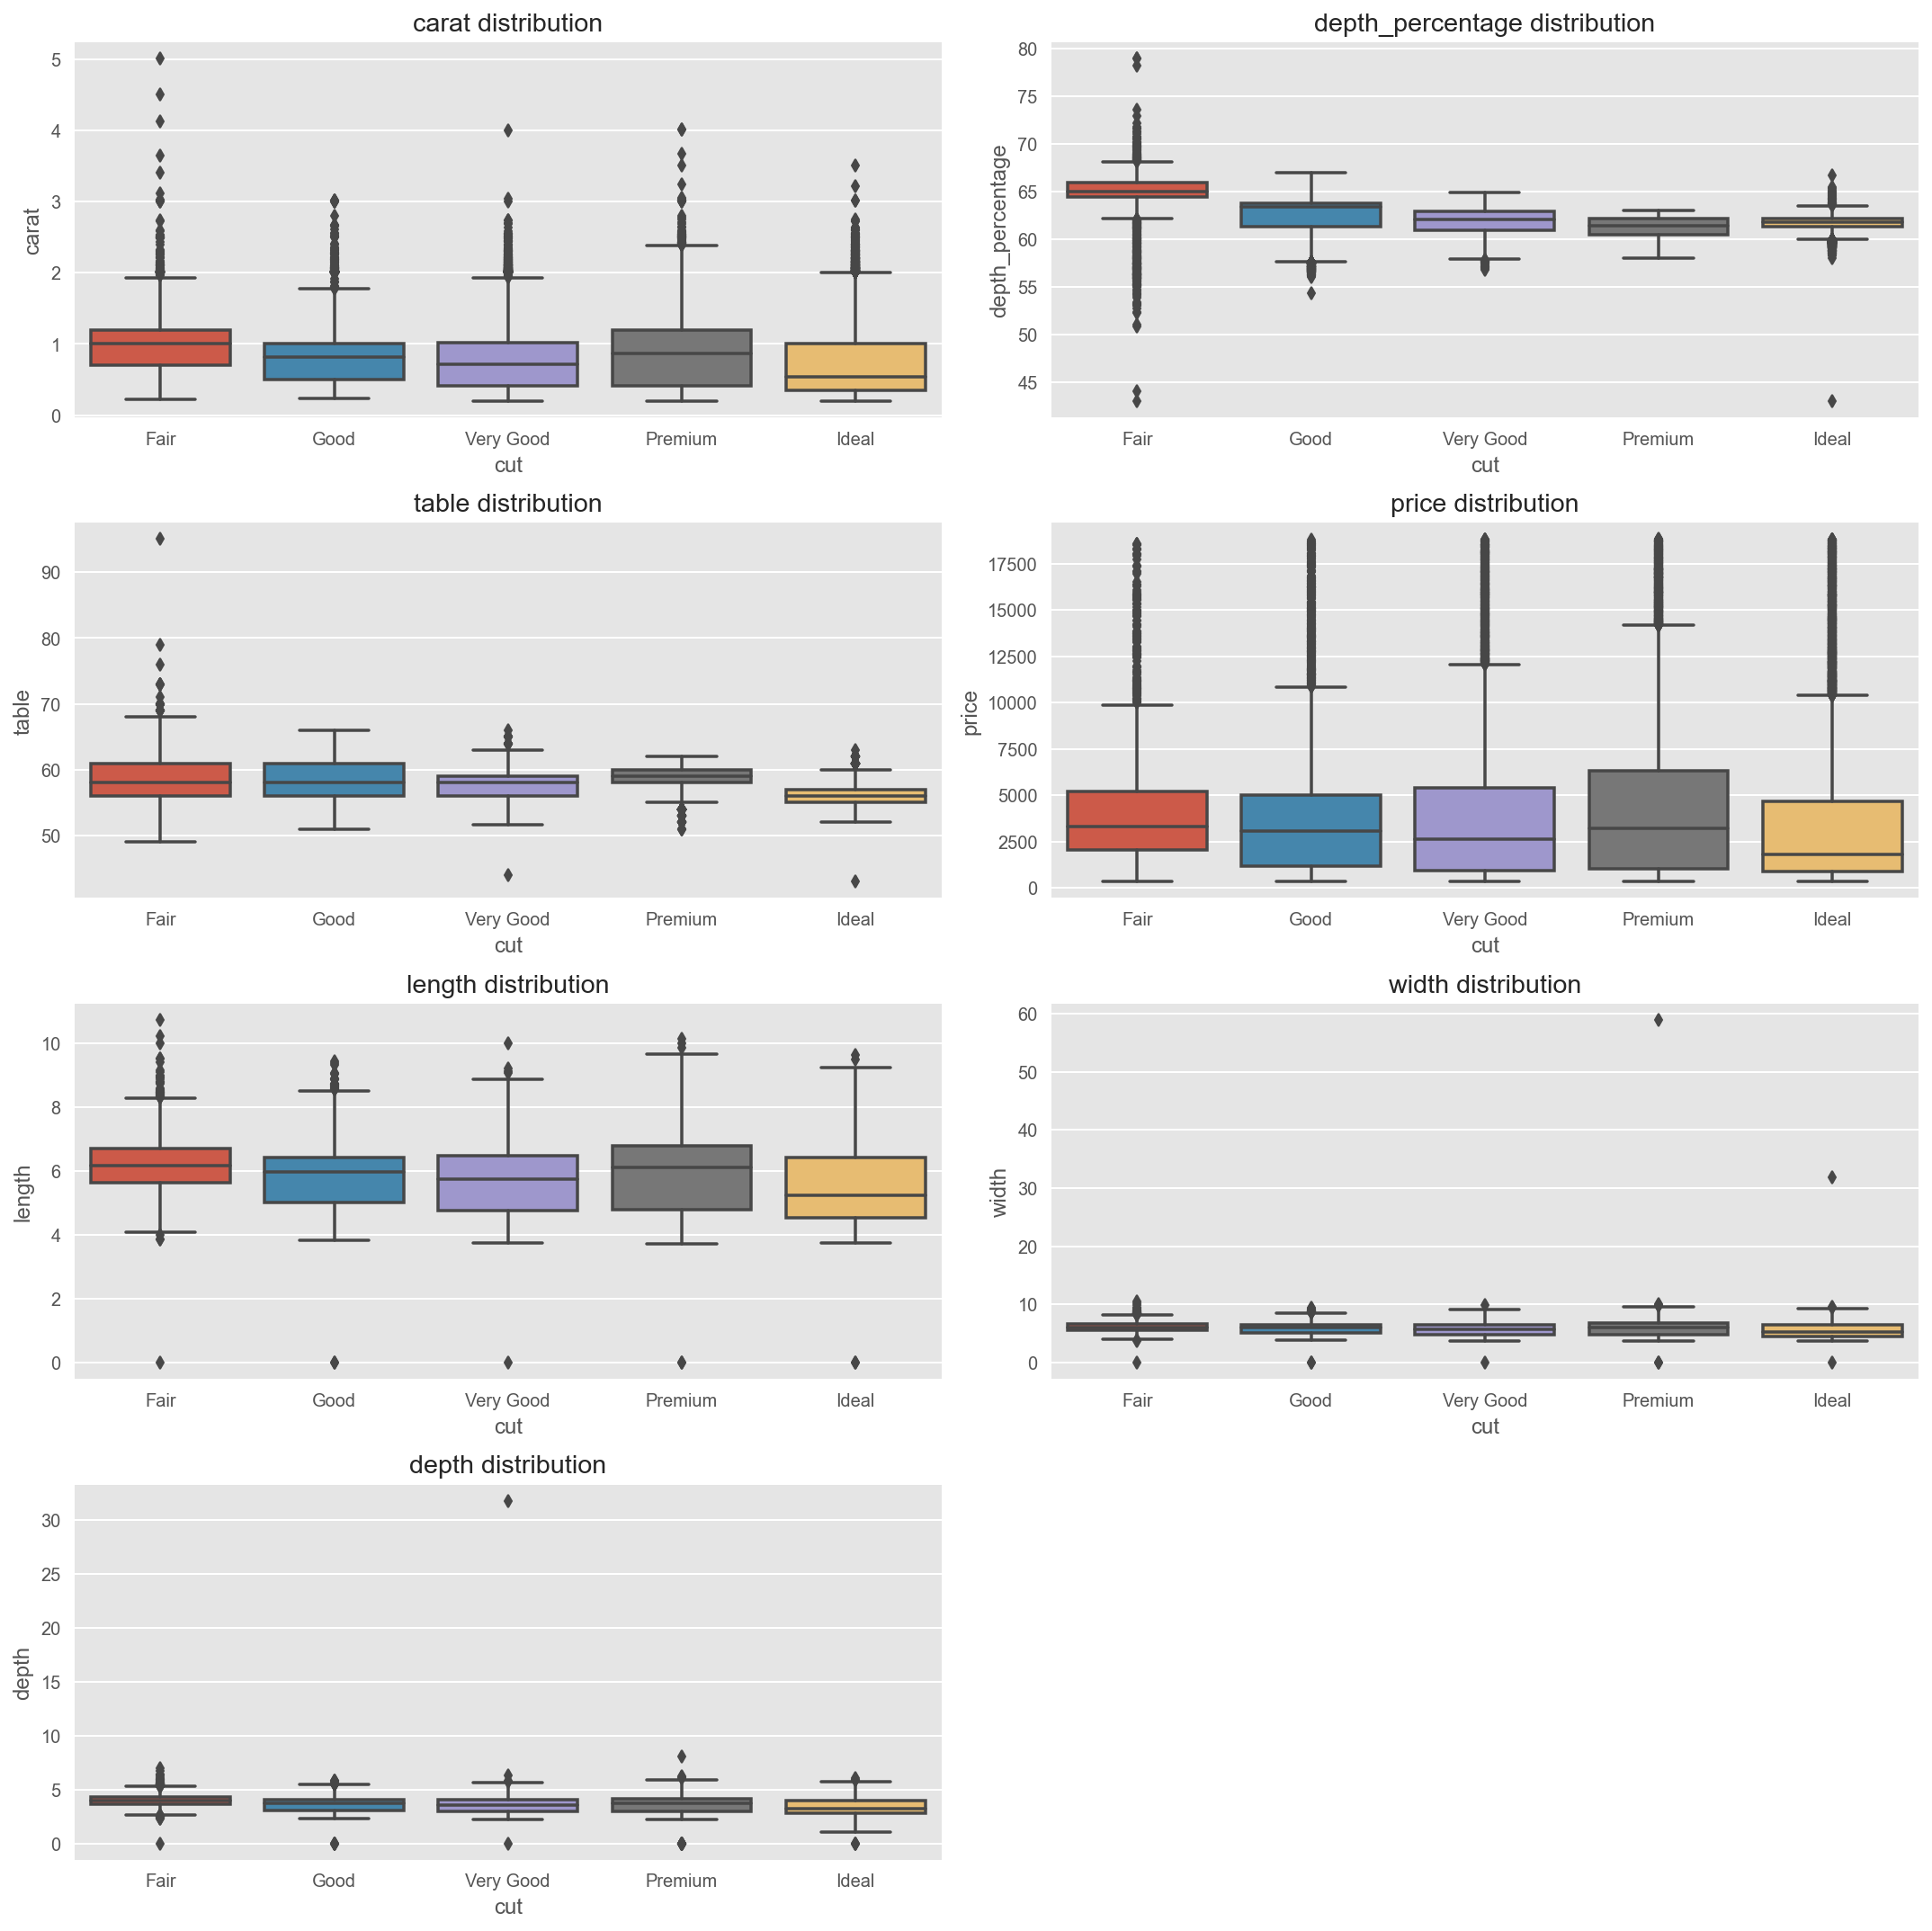

In [11]:
# define a figure to which we will add histogram of each attribute.
plt.figure(figsize=(15,15))

#use an index to identify the spot of the subplot
j = 1

# Columns
for k in numeric: #for each numeric column in the dataframe
    if k == 'length_width_ratio':
        continue
    plt.subplot(4,2,j)
    sns.boxplot(x="cut", y=k, data=df, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
    plt.title(k + " distribution");
    j = j + 1 #add 1 to go to the next subplot space

#show results
plt.tight_layout()
plt.show();

We can see that there are potential outliers for table, length, width, and depth. <br>Length, width, and depth all have zero values, which are not valid values for dimensions of diamonds based on our research. <br>Depth will require further investigation since it has a few records with extremely high values.

In addition to issues related to outliers, we see different scales in the features. Price, for example, has values up to 17500, whereas the highest value for Carat is 5. To make sure that our models can predict our response well we will need to transform the data to have similar scales for our attributes.

# Data Preparation

## Excluding invalid records

As mentioned in the EDA we can see several records that would need to be removed. First we delete those who have a zero in either x, y or z.

In [12]:
#checking number of records to delete
print(df[(df.length == 0) | (df.width == 0) | (df.depth == 0)].shape[0])

#excluding where 'x' or 'y' or 'z' = 0
df = df[(df.length != 0) & (df.width != 0) & (df.depth != 0)]

20


In [13]:
#sanity check
df.shape

(53920, 10)

Next we evaluate some extreme values for depth and width to understand if they make sense in the context of our problem.

In [14]:
df[(df.depth > 10) | (df.width > 30)]

,carat,cut,color,clarity,depth_percentage,table,price,length,width,depth
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


We see that for the 1 record with a width of 32 mm has a table value above that number. This is not consistent with our research.<br> We also have 1 record with Width of 59 mm, which is nearly 6 times the diamond length (8 mm) so we believe this record is not plausible either.<br>
Lastly the record with a depth of 31.8 mm is not consistent with the depth_percentage value according to our research. 
Because of the reasons mentioned above we will exclude these three records.

In [15]:
#excluding the 3 records above
df = df[(df.depth < 10) & (df.width < 30)]

In [16]:
#sanity check
df.shape

(53917, 10)

Next we will calculate the total depth percentage based on the formula in the data dictionary (2 * z / (x + y)) to see if it is the same as the actual column values. We will also take the absolute value of the difference with the original column to see if there is a discrepancy between the calculated and original field.

In [17]:
df['perc_real_depth'] = ((2 * df.depth) / (df.length + df.width)) * 100
df['perc_depth_difference'] = round(abs(df['depth_percentage'] - df['perc_real_depth']),2)

#get only the records where the difference is > 1 mm
df[df.perc_depth_difference > 1].shape#sort_values(by='perc_depth_difference', ascending=False)

(77, 12)

For these 77 records we have a depth_percentage difference of more than 1 mm so we will exclude these 77 records from the dataset. The reason we chose 1 mm as a threshold is because in the context of diamonds measurements as small as 1 mm could potentially make noticeable difference.<br><br>
It is worth noting that while we are opting to treat depth_percentage as the field that is incorrect it is also possible that the fields that we are using to calculate depth_percentage are what are causing the issue. 


In [18]:
df = df[df.perc_depth_difference < 1]

#sanity check
df.shape

(53840, 12)

For the rest of the records we will use the new depth percentage as the new field called perc_real_depth in the dataframe (This is done under the assumption that we can consider the rest of the values for length, width and depth as valid). <br><br>
In order to check how many records will be impacted, and the actual difference in the depth percentage, we use the code below.

In [19]:
df[df.perc_depth_difference > 0]['perc_depth_difference'].value_counts()

0.01    10216
0.02     9953
0.04     9899
0.03     9897
0.05     5275
        ...  
0.72        1
0.80        1
0.85        1
0.91        1
0.94        1
Name: perc_depth_difference, Length: 87, dtype: int64

We see that, out of the near 54000 records, 74% (40000 instances) have a difference of 0.3 mm or less in depth percentage, so the original value seem to be close to the one we calculated with the formula. We will proceed by using the new value in column 'perc_real_depth'.

In [20]:
#replacing with new calculated field
df['depth_percentage'] = df['perc_real_depth']

#excluding columns
del df['perc_real_depth']
del df['perc_depth_difference']

## Label encoding categorical attributes

Below we transform the 2 explanatory features (color and clarity) as well as the response (cut) to be able to do further analysis later in our study.

In [21]:
#replacing values
df.cut.replace({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}, inplace = True)
df.color.replace({'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}, inplace = True)
df.clarity.replace({'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}, inplace = True)

In [22]:
#sanity check
df.head()

,carat,cut,color,clarity,depth_percentage,table,price,length,width,depth
0,0.23,5,6,2,61.286255,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.767141,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.896552,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.396204,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.291139,58.0,335,4.34,4.35,2.75


## Creating new features

Based on our domain knowledge we found that creating an interaction feature of length to width ratio could be useful for our predictive models. 
Since we previously observed collinearity between length, width, and depth we will exclude width and depth from the dataframe.

In [23]:
#creating new feature
df['length_width_ratio'] =  df['length'] / df['width']

#deleting width and depth columns for collinearity
del df['width']
del df['depth']

#sanity check
df['length_width_ratio'].head()

0    0.992462
1    1.013021
2    0.995086
3    0.992908
4    0.997701
Name: length_width_ratio, dtype: float64

## Standardization

We will perform standardization since it is a requirement for several of our models.

In [24]:
# Splitting into predictors and response.
# -------------------------------------
X = df.loc[:, df.columns != 'cut'].copy()
y = df.loc[:, 'cut'].copy()

# Columns
columns = X.columns

# Normalized data
scaler = StandardScaler()
standarized = scaler.fit_transform(X.values)

# Restructuring it back into df
standarized = pd.DataFrame(standarized, index=df.index, columns=columns)

#sanity check
standarized.head(2)

,carat,color,clarity,depth_percentage,table,price,length,length_width_ratio
0,-1.197831,0.936605,-1.246020,-0.326456,-1.099865,-0.903954,-1.590858,-0.778818
1,-1.240056,0.936605,-0.638877,-1.393123,1.588286,-0.903954,-1.644459,1.533764


In [26]:
# adding the response
full = standarized.copy()
full['cut'] = y.copy()

# sanity check
full.head(2)

,carat,color,clarity,depth_percentage,table,price,length,length_width_ratio,cut
0,-1.197831,0.936605,-1.246020,-0.326456,-1.099865,-0.903954,-1.590858,-0.778818,5
1,-1.240056,0.936605,-0.638877,-1.393123,1.588286,-0.903954,-1.644459,1.533764,4


# Prepped Data Review

We will create a correlation matrix and boxplots to see our data after the data preparation section changes.

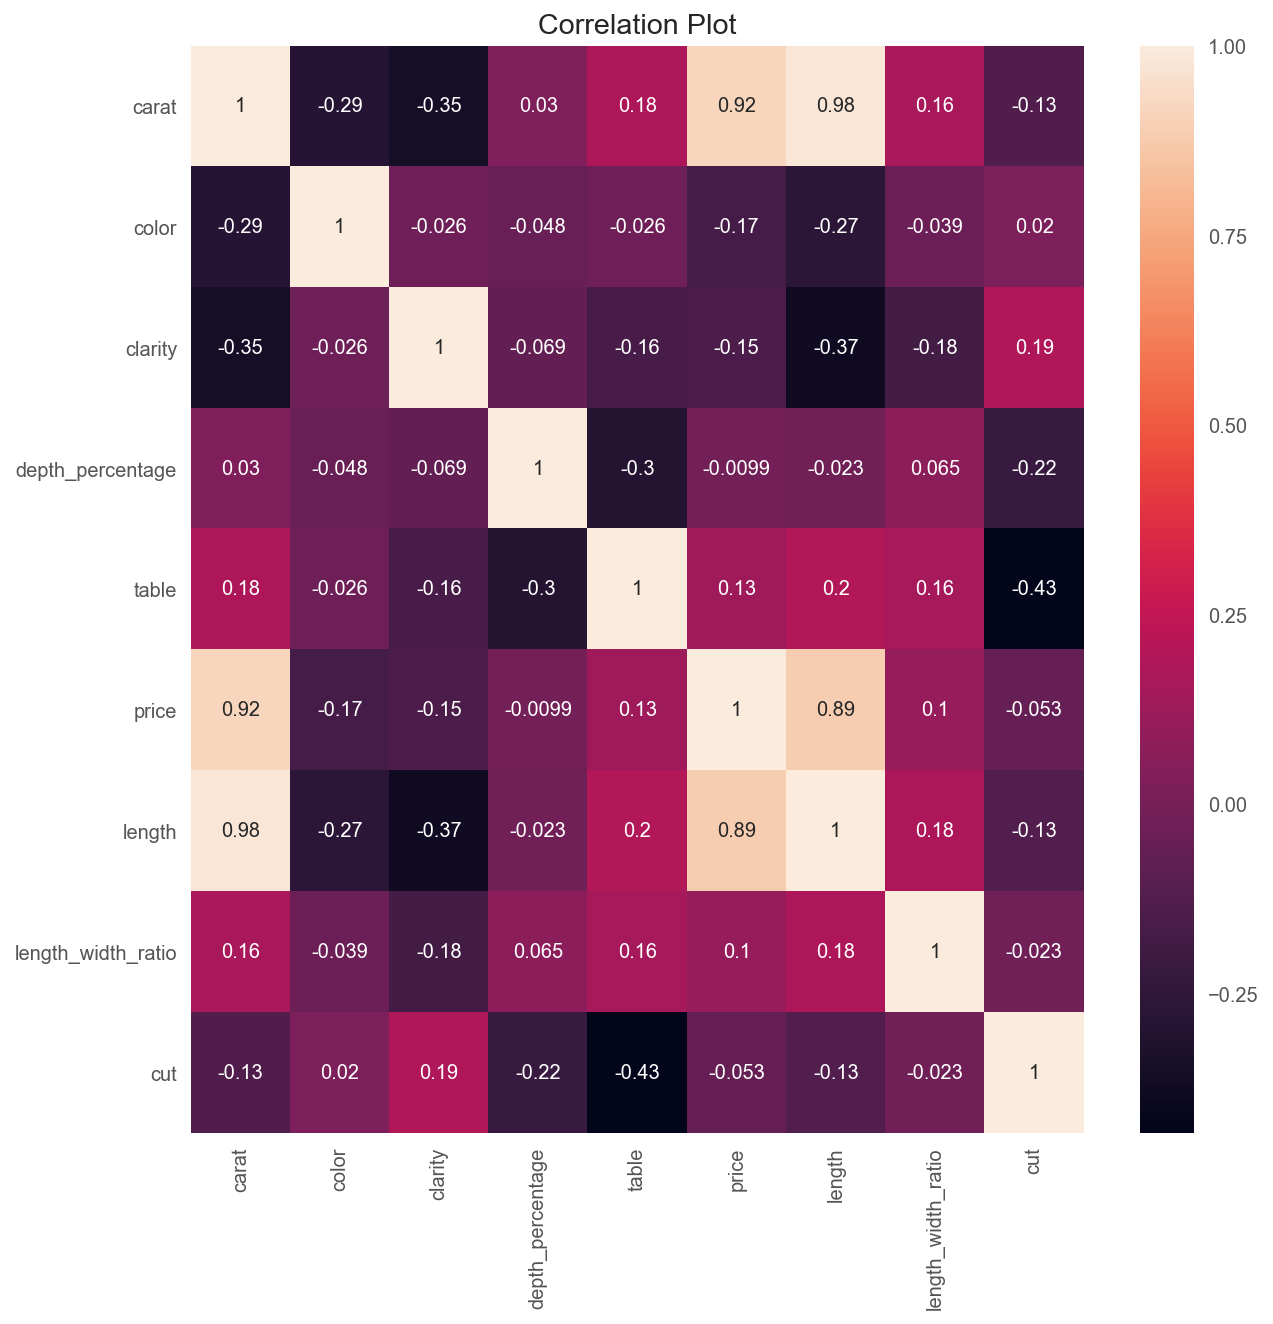

In [27]:
# initial correlation
cor2 = full.corr()
plt.figure(figsize=(10,10))
plt.title("Correlation Plot")
sns.heatmap(cor2,annot=True)
plt.show();

After including our interaction feature length_width_ratio in our correlation matrix we can see that it is not highly correlated with length despite it being one of the two attributes that created it.

Everything looks like it did before we standardized the variables. <br>
Now we will look at the boxplot of the features vs the response. We include out categorical attributes that were converted to numbers and then standardized with the rest of the numeric features.

Before doing that we set back the response to string values

In [28]:
#replacing values
full.cut.replace({1: 'Fair', 2: 'Good', 3: 'Very Good', 4: 'Premium', 5: 'Ideal'}, inplace = True)

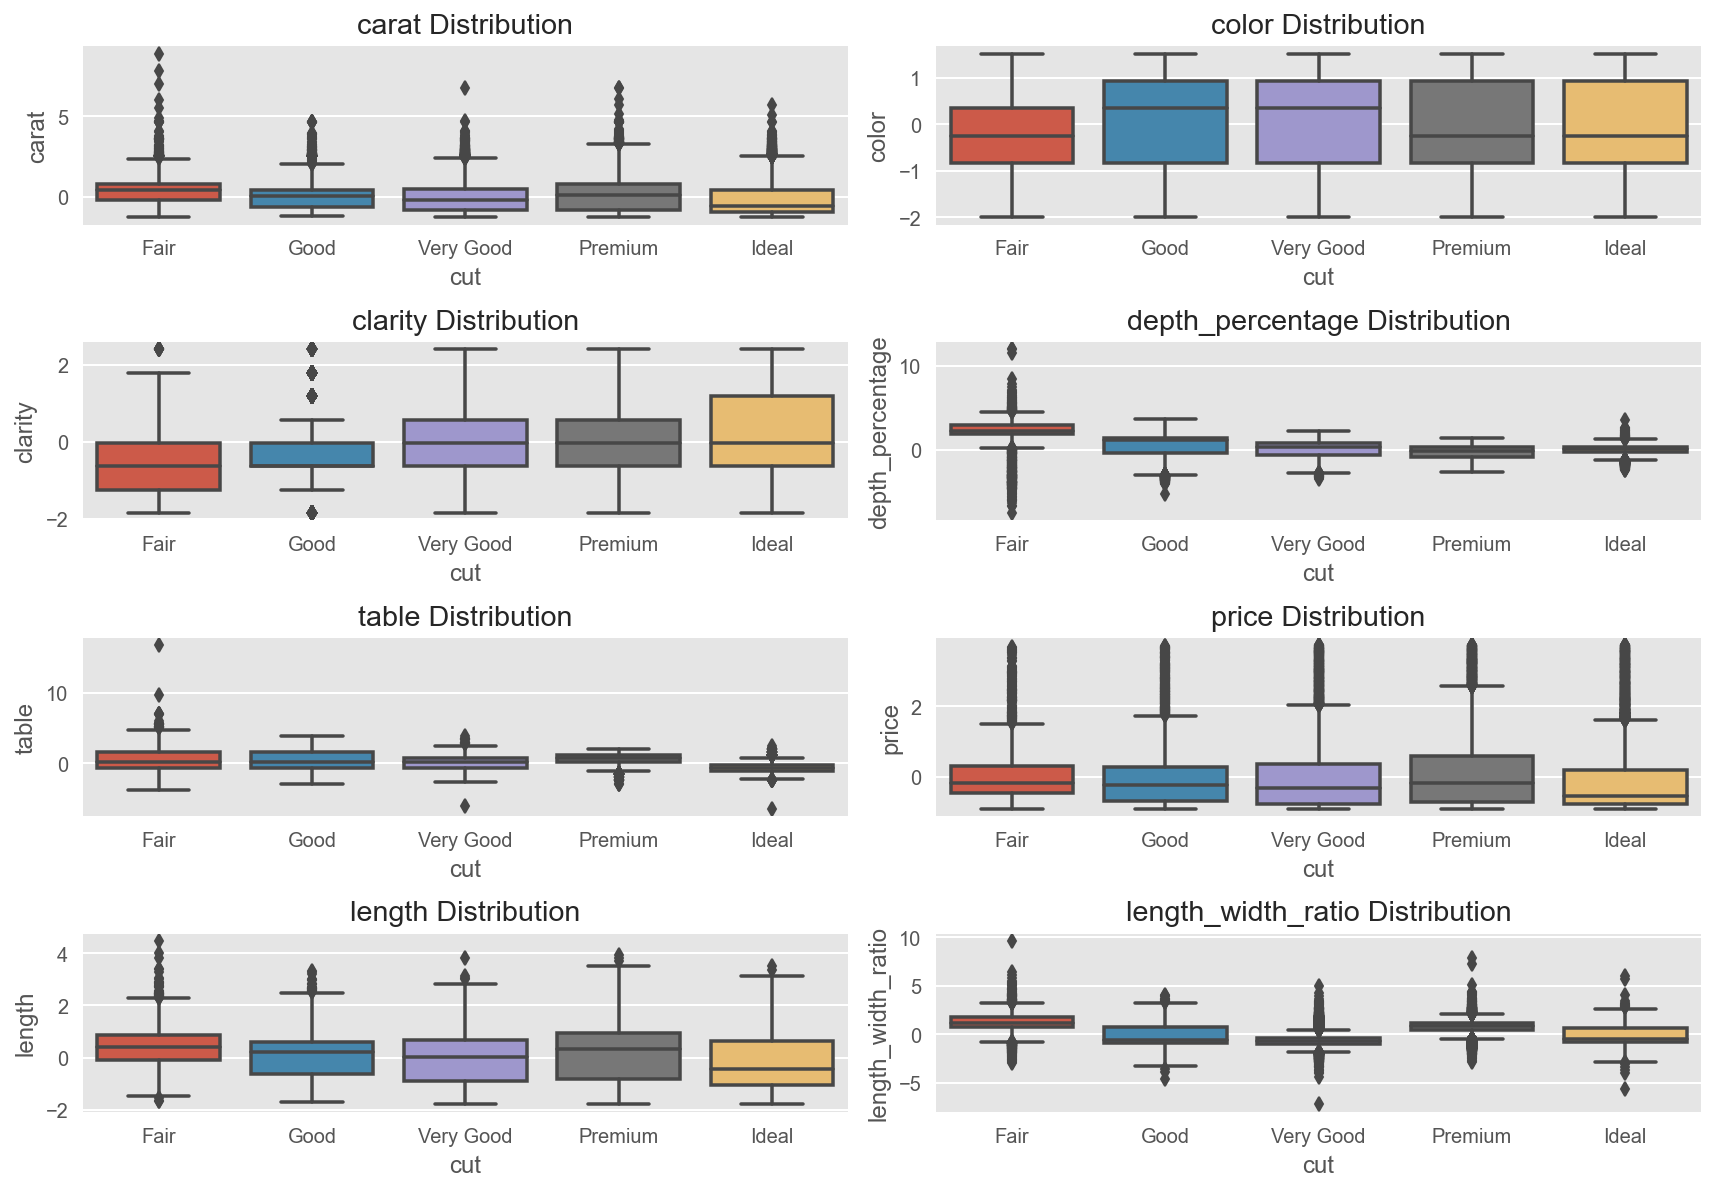

In [29]:
# define a figure to which we will add histogram of each attribute.
plt.figure(figsize=(12,10))

#use an index to identify the spot of the subplot
j = 1

# Columns
for k in full.columns: #for each numeric column in the dataframe
    if k == 'cut':
        continue
    plt.subplot(5,2,j)
    sns.boxplot(x="cut", y = k, data = full, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
    plt.title(k + " Distribution");
    j = j + 1 #add 1 to go to the next subplot space

#show results
plt.tight_layout()
plt.show();

We can see here that the standardization process was successful. Now we can move on the next section safely as all the features are on the similar scale.

# Feature selection
### Recursive feature elimination (RFE) with random forest.


RFE uses a classification method (i.e random forest), to assign weights to each of features. The attributes whose absolute weights are the smallest are pruned from the current set of features. That procedure is recursively repeated on the pruned data set until we get the desired number of features.<br><br>
The reason we chose random forest is because it is a tree based algorithm so we won't have to worry about treating the categorical variables and the numerical variables differently and we can simply feed all of them into our random forest classifier. Another reason we chose random forest is that it has been proven empirically by researchers to provide good results for both linear and nonlinear relationships between predictors. However, the presence of highly correlated predictors has been shown to negatively impact its ability to identify strong predictors which is why we manually removed highly collinear variables earlier in the study.

In [30]:
# Splitting into predictors and response.
# -------------------------------------
X = full.loc[:, full.columns != 'cut']
y = full.loc[:, 'cut']

# set the RF classifier and get the top 4 predictive features
rf_clf = RandomForestClassifier(n_jobs = -1)      
rfe = RFE(estimator=rf_clf, n_features_to_select = 4, step = 1)
rfe = rfe.fit(X, y)
print('Chosen best 4 feature by rfe:',X.columns[rfe.support_])

Chosen best 4 feature by rfe: Index(['depth_percentage', 'table', 'price', 'length_width_ratio'], dtype='object')


Based on our RFE and our domain knowledge, we will choose these four features going forward. <br>
- Depth percentage
- Table
- Price
- length_width_ratio

In [31]:
predictors = list(X.columns[rfe.support_])
predictors 

['depth_percentage', 'table', 'price', 'length_width_ratio']

# Machine Learning Modeling

As a general approach, for all the models we will have lists to store the metrics for both the training and testing set, and we will use gridsearch to select the best hyperparameters based on our analysis for each one. We will use the lists with the corresponding metrics in the model selection section.

To start we split the data into training and testing set, using stratify as one of the parameters to ensure that all response classification labels are proportionally represented in our training and testing subsets.

## Decision Tree

In this section we create a decision tree and we follow an empirical process as we chose the best hyper-parameters using a grid search. We will look for the best combination among the following parameters:

- __class_weight:__ Since we have an imbalance multiclass response, we want to be able to provide appropriate weights to each of them. To do this we define this parameter as "balanced" to automatically adjust weights inversely proportional to class frequencies in the input data.
- __max_depth:__ The maximum depth of the tree. To stop the nodes from expanding until all leaves are pure we specify a range between 3 and 10.
- __min_samples_split:__ The minimum number of samples required to split an internal node, as we have a minority class with 8, we specify 2 and 3 for this parameter.

In [36]:
#defining the scorers
f1_scorer = metrics.make_scorer(metrics.f1_score, average = 'macro')
precision_scorer = metrics.make_scorer(metrics.precision_score, average = 'macro')
recall_scorer = metrics.make_scorer(metrics.recall_score, average = 'macro')
accuracy_scorer = metrics.make_scorer(metrics.accuracy_score, average = 'macro')

# Lists to store the evaluation metrics
recall_list = []
f1_list = []
precision_list = []
accuracy_list = []

# defining explanatory and response
X = full[predictors]
y = full['cut']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 0, stratify=y)

In [33]:
# Train tree WITH gridsearch
parameters = {'min_samples_split':[2,3], 
              'max_depth':np.arange(3,10),'class_weight':['balanced']}

tr = tree.DecisionTreeClassifier()
grid = GridSearchCV(tr, parameters, scoring=f1_scorer, cv=5)
grid.fit(X_train, y_train)
model_est = grid.best_estimator_
model_params = grid.best_params_

In [34]:
grid.best_params_

{'class_weight': 'balanced', 'max_depth': 9, 'min_samples_split': 3}

In [37]:
ds_tree = tree.DecisionTreeClassifier(class_weight = 'balanced',
 min_samples_split = 3,
 criterion = 'entropy',
 max_depth = 9)
ds_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, min_samples_split=3)

In [36]:
# Make predictions
train_predictions = ds_tree.predict(X_train)
predictions = ds_tree.predict(X_test)

Evaluating on the training set

In [37]:
y_train.value_counts()

Ideal        17225
Premium      10990
Very Good     9661
Good          3921
Fair          1275
Name: cut, dtype: int64

C:\Users\julir\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\julir\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


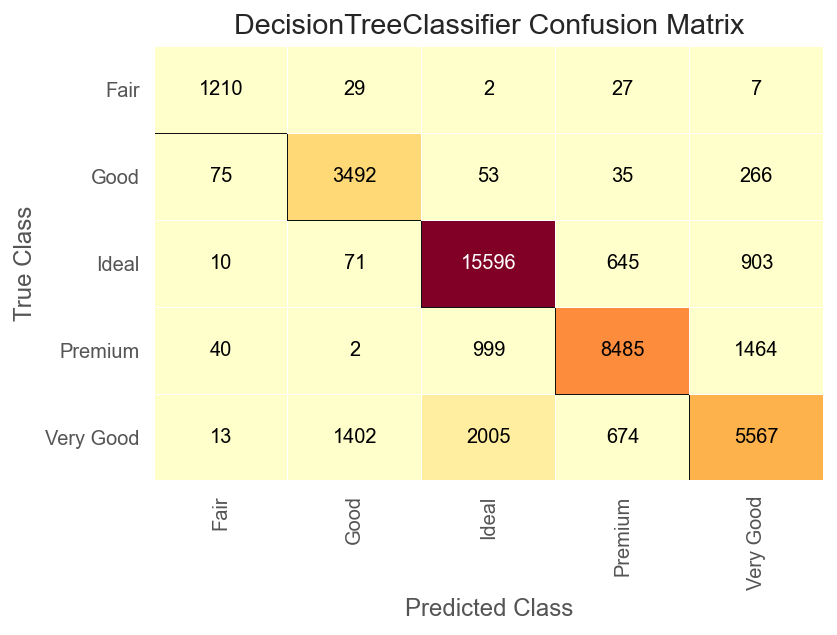

In [38]:
model_cm = ConfusionMatrix(
    ds_tree, classes=['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
)
model_cm.score(X_train, y_train)
model_cm.show()

Now we see the metrics for each class

In [39]:
mcm_training = multilabel_confusion_matrix(train_predictions, y_train, labels=['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'])

tn = mcm_training[:, 0, 0]
tp = mcm_training[:, 1, 1]
fn = mcm_training[:, 1, 0]
fp = mcm_training[:, 0, 1]

#Calculating metrics
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = (2 * precision * recall) / (precision + recall)
accuracy = (tp + tn) / (tp + fp + fn + tn)

metrics_summary = pd.DataFrame()
metrics_summary['Class'] = ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
metrics_summary['Specificity'] = specificity
metrics_summary['Recall'] = recall
metrics_summary['Precision'] = precision
metrics_summary['F1'] = f1
metrics_summary['Accuracy'] = accuracy
metrics_summary

,Class,Specificity,Recall,Precision,F1,Accuracy
0,Fair,0.998442,0.897626,0.949020,0.922608,0.995287
1,Good,0.988733,0.698959,0.890589,0.783223,0.955122
2,Ideal,0.933284,0.836023,0.905428,0.869342,0.891159
3,Premium,0.924562,0.860024,0.772066,0.813675,0.909779
4,Very Good,0.882576,0.678323,0.576234,0.623125,0.843657


In [40]:
recall_list.append(np.mean(cross_val_score(ds_tree,  X_train, y_train, scoring = recall_scorer)))
f1_list.append(np.mean(cross_val_score(ds_tree,  X_train, y_train, scoring = f1_scorer)))
precision_list.append(np.mean(cross_val_score(ds_tree,  X_train, y_train, scoring = precision_scorer)))
accuracy_list.append(np.mean(cross_val_score(ds_tree,  X_train, y_train, scoring = 'accuracy')))

__Testing Scores for Model 1: Decision tree__

In [41]:
# Cross validation on the testing set and store results
recall_testing = []
f1_testing = []
precision_testing = []
accuracy_testing = []

y_pred = ds_tree.predict(X_test)
precision_testing.append(np.mean(metrics.precision_score(y_test, y_pred, average = None)))
recall_testing.append(np.mean(metrics.recall_score(y_test, y_pred, average = None)))
f1_testing.append(np.mean(metrics.f1_score(y_test, y_pred, average = None)))
accuracy_testing.append(np.mean(metrics.accuracy_score(y_test, y_pred)))

# Random Forest

In this section we create a Random Forest algorithm. We will use the default sklearn parameters for:
- __n_estimators:__ the number of trees in the forest, we keep the default, which is 100.
- __max_depth:__ The maximum depth of the tree. To avoid that the nodes get expanded until all leaves are pure we specify a range between 5 and 10.
- __class_weight:__ Since we have an imbalance multiclass response, we want to be able to provide appropriate weights to each of them. To do this we define this parameter to "balanced" to automatically adjust weights inversely proportional to class frequencies in the input data.

Because we are not worried very worried about time complexity, we are merely looking to create a "good" classifier.

In [42]:
parameters = {'max_depth':np.arange(5,10),
              'class_weight':['balanced']}

random_f = RandomForestClassifier()
grid = GridSearchCV(random_f, parameters, scoring=f1_scorer, cv=5, n_jobs = -1)
grid.fit(X_train, y_train)
model_est = grid.best_estimator_
model_params = grid.best_params_
grid.best_params_

{'class_weight': 'balanced', 'max_depth': 9}

In [43]:
# Random forest with my favourite state, state 42
rfc = RandomForestClassifier(random_state = 42, class_weight = 'balanced', max_depth = 9)
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, random_state=42)

In [44]:
# Storing in the results
recall_list.append(np.mean(cross_val_score(rfc,  X_train, y_train, scoring = recall_scorer)))
f1_list.append(np.mean(cross_val_score(rfc,  X_train, y_train, scoring = f1_scorer)))
precision_list.append(np.mean(cross_val_score(rfc,  X_train, y_train, scoring = precision_scorer)))
accuracy_list.append(np.mean(cross_val_score(rfc,  X_train, y_train, scoring = 'accuracy')))

In [45]:
# making predictions on training and testing set
train_predictions = rfc.predict(X_train)
predictions = rfc.predict(X_test)

In [46]:
# Cross validation on the testing set and store results
y_pred = rfc.predict(X_test)
precision_testing.append(np.mean(metrics.precision_score(y_test, y_pred, average = None)))
recall_testing.append(np.mean(metrics.recall_score(y_test, y_pred, average = None)))
f1_testing.append(np.mean(metrics.f1_score(y_test, y_pred, average = None)))
accuracy_testing.append(np.mean(metrics.accuracy_score(y_test, y_pred)))

### Gradient Boosting Classifer

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

The overall parameters of this ensemble model can be divided into 3 categories:

- __Tree-Specific Parameters:__ These affect each individual tree in the model. Considering trees as the 'weak' learner we will use the same set of parameters that we used for our previous decision tree model.
    - __max_depth:__ The maximum depth of the tree. To avoid that the nodes get expanded until all leaves are pure we specify a range between 7 and 9.
- __Boosting Parameters:__ These affect the boosting operation in the model.
    - __learning_rate:__ Because the predictions of each tree are summed together, the contributions of the trees can be inhibited or slowed down using a technique called shrinkage. A "learning rate" is adjusted, and when the learning rate is reduced more trees must be added to the model. This makes it so that the model needs longer to train. There's a trade-off between the learning rate and the number of trees needed, so we will experiment to find the best values, but as we know that in general small values less than 0.1 or values between 0.1 and 0.3 often work well, we will use the following set of learning rates: [0.05, 0.1, 0.3].
    - __n_estimators:__ Represents the number of sequential trees to be modeled. Though GB is fairly robust at higher number of trees but it can still overfit at a point. Hence, we will tune using CV for a particular learning rate using the following values [20, 50, 100].
    - __subsample:__ The fraction of observations to be selected for each tree. Selection is done by random sampling. Values slightly less than 1 make the model robust by reducing the variance. Considering that this parameter interacts with n_estimators and that typical values ~0.8 generally work fine we will try with this value.

- __Miscellaneous Parameters:__ Other parameters for overall functioning.
    - __loss:__ It refers to the loss function to be minimized in each split. We will use the default for GradientBoostingClassifier which is 'deviance'.

In [47]:
# Train GB WITH gridsearch
parameters = {'max_depth':np.arange(7,9),
              'learning_rate': [0.05, 0.1, 0.3],
              'n_estimators': [20, 50, 100],
              'subsample': [0.8]}

gradient_b = GradientBoostingClassifier()
grid = GridSearchCV(gradient_b, parameters, scoring=f1_scorer, cv=5, verbose=10, n_jobs=-1) #verbose to see execution details
grid.fit(X_train, y_train)
model_est = grid.best_estimator_
model_params = grid.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed: 12.9min remaining:   45.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 14.0min finished


In [48]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}

In [49]:
# train the model with the best hyperparameters found by grid search
gb_clf = GradientBoostingClassifier(
 max_depth = 7,
 learning_rate = 0.05,
 n_estimators = 50,
 subsample = 0.8)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=7, n_estimators=50,
                           subsample=0.8)

In [50]:
# Storing in the results
recall_list.append(np.mean(cross_val_score(gb_clf,  X_train, y_train, scoring = recall_scorer)))
f1_list.append(np.mean(cross_val_score(gb_clf,  X_train, y_train, scoring = f1_scorer)))
precision_list.append(np.mean(cross_val_score(gb_clf,  X_train, y_train, scoring = precision_scorer)))
accuracy_list.append(np.mean(cross_val_score(gb_clf,  X_train, y_train, scoring = 'accuracy')))

In [51]:
# making predictions on training and testing set
train_predictions = gb_clf.predict(X_train)
predictions = gb_clf.predict(X_test)

In [52]:
# Cross validation on the testing set and store results
y_pred = gb_clf.predict(X_test)
precision_testing.append(np.mean(metrics.precision_score(y_test, y_pred, average = None)))
recall_testing.append(np.mean(metrics.recall_score(y_test, y_pred, average = None)))
f1_testing.append(np.mean(metrics.f1_score(y_test, y_pred, average = None)))
accuracy_testing.append(np.mean(metrics.accuracy_score(y_test, y_pred)))

### Stochastic Gradient Descent Classifier

- __alpha:__ A constant that multiplies the regularization term. The higher the value, the stronger the regularization. Also used to compute the learning rate when set to learning_rate is set to ‘optimal', which is actually the learning rate that we are going to use. The values we are going to try are [0.03, 0.04, 0.1,0.0001]. 0.0001 is the default.

- __learning_rate:__  Determines the step size at each iteration while moving toward a minimum of a loss function. Here this parameter schedules how the learning rate changes and we are going to choose the default value here which is 'optimal'.
    - ‘optimal’: eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou. For more information please refer to the research paper Stochastic Gradient Descent Tricks in this link: https://cilvr.cs.nyu.edu/diglib/lsml/bottou-sgd-tricks-2012.pdf

- __penalty:__ Here the penalty refers to regularization, which is the process of adding information in order to solve an ill-posed problem or to prevent over-fitting. The arguments that we are going to use for this parameters are [ 'l1', 'l2', 'None']. A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression. Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function. The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. We will test both values l1 and l2 and decide which one to use based on our grid-search results. we will also try without penalization.

- __n_jobs:__ The number of CPUs to use to do the OVA (One Versus All, for multi-class problems) computation. We use -1 to use all processors and allow the grid search to run faster. 

- __loss:__ In mathematical optimization and decision theory, a loss function or cost function is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event. An optimization problem seeks to minimize a loss function. Here are the loss function we are going to try in our grid-search [hinge, log]
    
    - Hinge: The hinge loss is a loss function used for training classifiers. The hinge loss is used for "maximum-margin" classification.
    
    - Log: Logarithmic loss (related to cross-entropy) measures the performance of a classification model where the prediction input is a probability value between 0 and 1. Log Loss is a slight twist on the Likelihood Function. Log Loss is -1 * the log of the likelihood function. The likelihood function answers the question "How likely did the model think the actually observed set of outcomes was.". For this reason, we think that the log function is worth trying.
   
- __shuffle:__ Considering that if the training data is not sufficiently randomized, the algorithm will likely perform poorly we set this parameter to 'True'.

- __max_iter:__ We want to see if increasing the number of iterations, trying first with 100, and then with the default (which is 1000) causes the stochastic gradient descent to converge to an appropriate value.

In [53]:
params = {'loss' : ["hinge", "log"], 
          #Changing the loss from hinge to log 
          #is changing the algorithm from an SVM to a logistic regression, I don't think all the rest of the 
          #parameters make sense to use in SVM and/or in logistic regression
          
          'penalty' : ["l2", "l1", "elasticnet","None"],
          'alpha': [0.03, 0.04, 0.1,0.0001],
          'shuffle' : [True] ,
          'learning_rate' :['optimal'],
          'max_iter':  [100, 1000]}

sgd_clf = SGDClassifier()
grid = GridSearchCV(sgd_clf, params, scoring=f1_scorer, cv=5, verbose=10, n_jobs=-1) #verbose to see execution details
grid.fit(X_train, y_train)
model_est = grid.best_estimator_
grid.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

{'alpha': 0.0001,
 'learning_rate': 'optimal',
 'loss': 'log',
 'max_iter': 100,
 'penalty': 'None',
 'shuffle': True}

In [54]:
# train the model with the best hyperparameters found by grid search
sgd_clf = SGDClassifier(
 alpha = 0.0001,
 learning_rate = 'optimal',
 loss = 'log',
 max_iter = 100,
 n_jobs = -1,
 penalty = 'None',
 shuffle = True)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.03, loss='log', max_iter=100, n_jobs=-1, penalty='None')

In [55]:
# Storing in the results
recall_list.append(np.mean(cross_val_score(sgd_clf,  X_train, y_train, scoring = recall_scorer)))
f1_list.append(np.mean(cross_val_score(sgd_clf,  X_train, y_train, scoring = f1_scorer)))
precision_list.append(np.mean(cross_val_score(sgd_clf,  X_train, y_train, scoring = precision_scorer)))
accuracy_list.append(np.mean(cross_val_score(sgd_clf,  X_train, y_train, scoring = 'accuracy')))

In [56]:
# making predictions on training and testing set
train_predictions = sgd_clf.predict(X_train)
predictions = sgd_clf.predict(X_test)

In [57]:
# Cross validation on the testing set and store results
y_pred = sgd_clf.predict(X_test)
precision_testing.append(np.mean(metrics.precision_score(y_test, y_pred, average = None)))
recall_testing.append(np.mean(metrics.recall_score(y_test, y_pred, average = None)))
f1_testing.append(np.mean(metrics.f1_score(y_test, y_pred, average = None)))
accuracy_testing.append(np.mean(metrics.accuracy_score(y_test, y_pred)))

### XGBoost Classifier

Following ML Pocket Reference, although sklearn has a GradientBoostedClassifier, it is better to use a third-party implementation that uses extreme boosting, which tend to provide better results.

The parameters list in the third party XGBoost website and ML pocket reference chapter 10 were used to provide support for hyperparameters selection for grid-search execution.

- __max_depth:__ maximum tree depth, and considering we have previous results between 7 and 9 we will test the performance between this range.
- __eta (learning_rate):__ Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative. Considering the default parameter is 0.3 and it usually works well we will include it in our list. We will use [0.05, 0.1, 0.45]. The last one was added to represent a big step comparing to the other two.
- __n_estimators:__ Number of rounds or boosted trees. We will tune using CV for a particular learning rate with the default 100 included. We will use the same options as in gradient boosting [50, 70].

In [60]:
# Train XGBoost WITH gridsearch
parameters = {'max_depth':np.arange(7,9),
            'learning_rate': [0.05, 0.1, 0.45],
             'n_estimators': [50, 100]
             }

xgb_class = xgb.XGBClassifier()
grid = GridSearchCV(xgb_class, parameters, scoring=f1_scorer, cv = 5, verbose=10, n_jobs=-1) #verbose to see execution details
grid.fit(X_train, y_train)
model_est = grid.best_estimator_
grid.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:  4.6min remaining:   42.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  5.3min finished


{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 50}

In [61]:
# train the model with the best hyperparameters found by grid search
xgb_clf = xgb.XGBClassifier(
 max_depth = 8,
 learning_rate = 0.05,
 n_estimators = 50)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
# Storing in the results
recall_list.append(np.mean(cross_val_score(xgb_clf,  X_train, y_train, scoring = recall_scorer)))
f1_list.append(np.mean(cross_val_score(xgb_clf,  X_train, y_train, scoring = f1_scorer)))
precision_list.append(np.mean(cross_val_score(xgb_clf,  X_train, y_train, scoring = precision_scorer)))
accuracy_list.append(np.mean(cross_val_score(xgb_clf,  X_train, y_train, scoring = 'accuracy')))

In [63]:
# making predictions on training and testing set
train_predictions = xgb_clf.predict(X_train)
predictions = xgb_clf.predict(X_test)

In [64]:
# Cross validation on the testing set and store results
y_pred = xgb_clf.predict(X_test)
precision_testing.append(np.mean(metrics.precision_score(y_test, y_pred, average = None)))
recall_testing.append(np.mean(metrics.recall_score(y_test, y_pred, average = None)))
f1_testing.append(np.mean(metrics.f1_score(y_test, y_pred, average = None)))
accuracy_testing.append(np.mean(metrics.accuracy_score(y_test, y_pred)))

# Model Selection
In this section we look closer at the metrics we collected and create a table for training set and one for testing set.

In [65]:
print("\t  The Model Metric Matrix for Training")
# Training
metrics_summary_training = pd.DataFrame()
metrics_summary_training['Model #'] = ['Decision Tree', 'Random Forest', 'Gradient Boosting Classifier',
                                       'Stochastic Gradient Descent Classifier', 'XG Boost Classifier']
metrics_summary_training['Predictors'] = [4,4,4,4,4]
metrics_summary_training['Recall'] = recall_list
metrics_summary_training['Precision'] = precision_list
metrics_summary_training['F1_score'] = f1_list
metrics_summary_training['Accuracy_score'] = accuracy_list

#testing
metrics_summary_testing = pd.DataFrame()
metrics_summary_testing['Model #'] = ['Decision Tree', 'Random Forest', 'Gradient Boosting Classifier', 
                                       'Stochastic Gradient Descent Classifier', 'XG Boost Classifier']
metrics_summary_testing['Predictors'] = [4,4,4,4,4]
metrics_summary_testing['Recall'] = recall_testing
metrics_summary_testing['Precision'] = precision_testing
metrics_summary_testing['F1_score'] = f1_testing
metrics_summary_testing['Accuracy_score'] = accuracy_testing

metrics_summary_training

	  The Model Metric Matrix for Training


,Model #,Predictors,Recall,Precision,F1_score,Accuracy_score
0,Decision Tree,4,0.796869,0.774315,0.781645,0.787820
1,Random Forest,4,0.803902,0.793238,0.794352,0.794669
2,Gradient Boosting Classifier,4,0.792280,0.818307,0.802790,0.804467
3,Stochastic Gradient Descent Classifier,4,0.507276,0.662655,0.517765,0.654439
4,XG Boost Classifier,4,0.791996,0.817916,0.803604,0.804351


The model metric matrix above shows the evaluation scores for each of the five models. It contains the `F1_Score`, `Recall`, `Precision`, and `Accuracy` scores for the training dataset. We can see that the Stochastic gradient descent classifier has 0.64 accuracy and 0.51 F1 Score which is barely better than a random model and given that the null error rate is 40%. Because of this we will remove this model from our study. In the model metrics matrix below we are going to have a look at how these models perform on the testing data.

Evaluating on the test set

In [66]:
print("\t  The Model Metric Matrix for testing")
metrics_summary_testing

	  The Model Metric Matrix for testing


,Model #,Predictors,Recall,Precision,F1_score,Accuracy_score
0,Decision Tree,4,0.799528,0.778448,0.784756,0.792162
1,Random Forest,4,0.806318,0.795037,0.796264,0.798570
2,Gradient Boosting Classifier,4,0.787818,0.814993,0.800069,0.803770
3,Stochastic Gradient Descent Classifier,4,0.506605,0.647965,0.519129,0.656018
4,XG Boost Classifier,4,0.792247,0.818668,0.804117,0.805071


- Decision Tree testing scores are consistent with that the scores of the training.

- Random Forest shows consistency and is a bit higher in terms of metrics than the Decision Tree, however this decision tree has 50 estimators, which could prove challenging to interpret.

- Gradient Boosting is slightly worse on the testing set in almost all the metrics, which raises some flags to whether or not this model could generalize well on unseen data, so in this case we will choose to eliminate Gradient boosting from our selection pool.

- XGBoost seems to be consistent in terms of scores for both the training and testing data and it is also noteworthy that this model outperforms random forest in all aspects except for recall (both training and testing), however both of these models are complex and hard to interpret, unlike the simple decision tree, which has relatively high scores as well.

We are now left to choose between XGBoost being the highest performing model overall and The Decision Tree which is a model that has lower performance but preserves model explainability, in comparison to the rest of them that represents a “black box”. Given that this dataset focuses on the subject of diamonds which are one the more expensive items on the market it is important to ask ourselves how much better is XGboost than decision trees and is it worth to sacrifice the extra ~2% of F1 Score and the answer of this question isn't very clear as it depends on the specific diamond cut misclassifications type.

To make the best choice we will take a look at the confusion matrix on the testing set between Decision Tree and XGBoost to understand which one of the classifications each one is not doing properly.

C:\Users\julir\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\julir\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


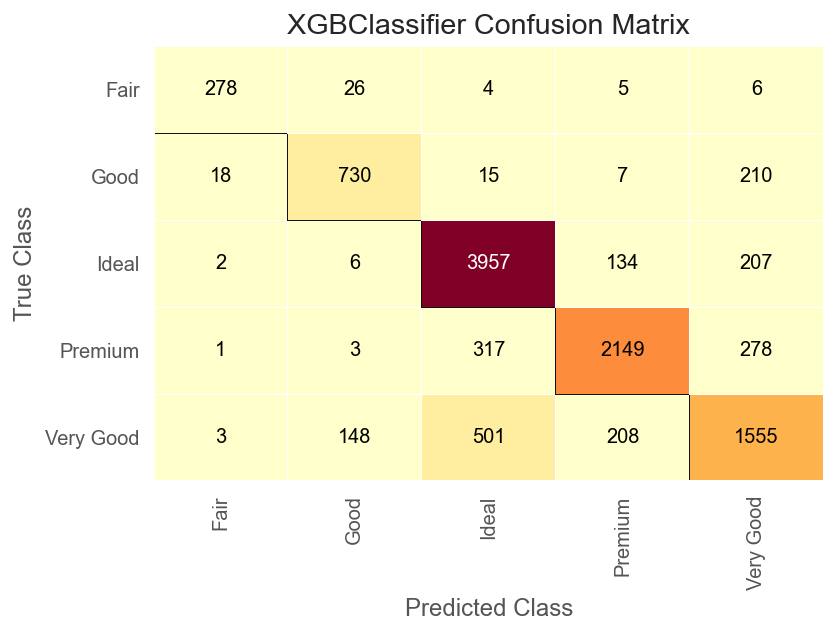

In [67]:
model_cm = ConfusionMatrix(
    xgb_clf, classes=['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
)
model_cm.score(X_test, y_test)
model_cm.show()

C:\Users\julir\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\julir\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


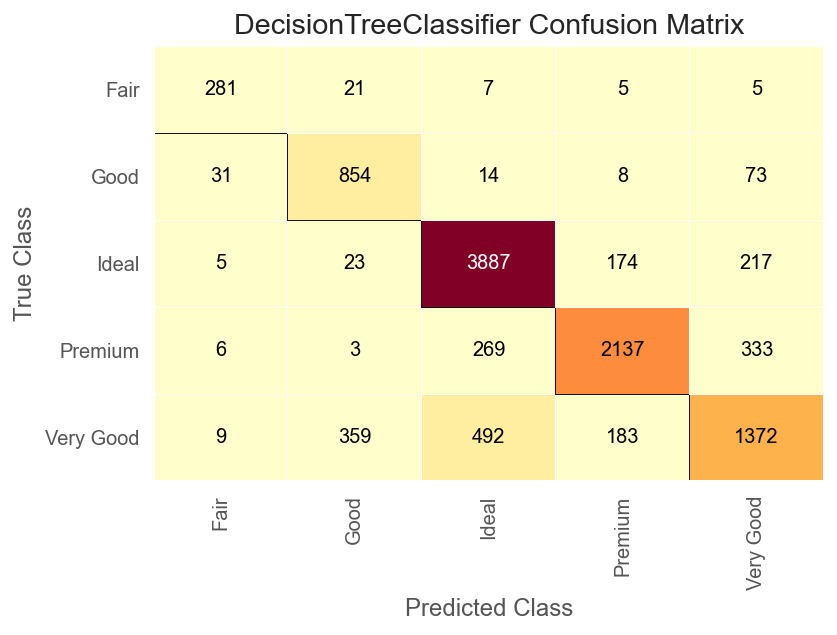

In [38]:
model_cm = ConfusionMatrix(
    ds_tree, classes=['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
)
model_cm.score(X_test, y_test)
model_cm.show()

Here we examine the two confusion matrices for both the XGBoost classifier and the decision tree classifier on the testing set.

- One of the main concerns that we had is that the model would misclassify a poorly cut diamond as a well cut diamond or vise-versa.

- General observations:
    - Fair: We observe that this class is well predicted by both models and there are very few instances of it predicted as other classes across both models. 
    - Good: We observe that this class is well predicted by both models and there are very few instances of it predicted as other classes across both models. We observe that there are 200 observations that are misclassified as "Very Good" in the XGBoost Model which seem to be correctly classified in the Decision Tree Classifier
    - Ideal: We observe that this class is well predicted by both models and there are relatively few instances of it predicted as other classes across both models.
    - Premium: We observe that this class is well predicted by both models and there are relatively few instances of it predicted as other classes across both models.
    - Very Good: We observe that this class is not well predicted by both models and there are relatively large number of instances of it predicted as other classes across both models. We observe that "Good" has a significantly higher number of misclassifications in the Decision Tree Classifier relative to the XGBoost Classifier


- Costly misclassifications:
    - It would stand to reason that Ideal is the best cut and therefore the cost of misclassification is very high and that the cost of misclassification that is furthest from the Ideal class (i.e. fair and good) is where the highest cost will be incurred. 
    - We observe that XGBoost outperforms the decision tree for misclassifications of Ideal for classes Fair and Good. We see that the Decision Tree misclassifies Fair and Good at roughly 2x and 4x more respectively. 
    - We observe a similar pattern with Premium.
    
For the above reasons we choose XGBoost as our preferred model. Below we apply our selected model to the testing dataset.

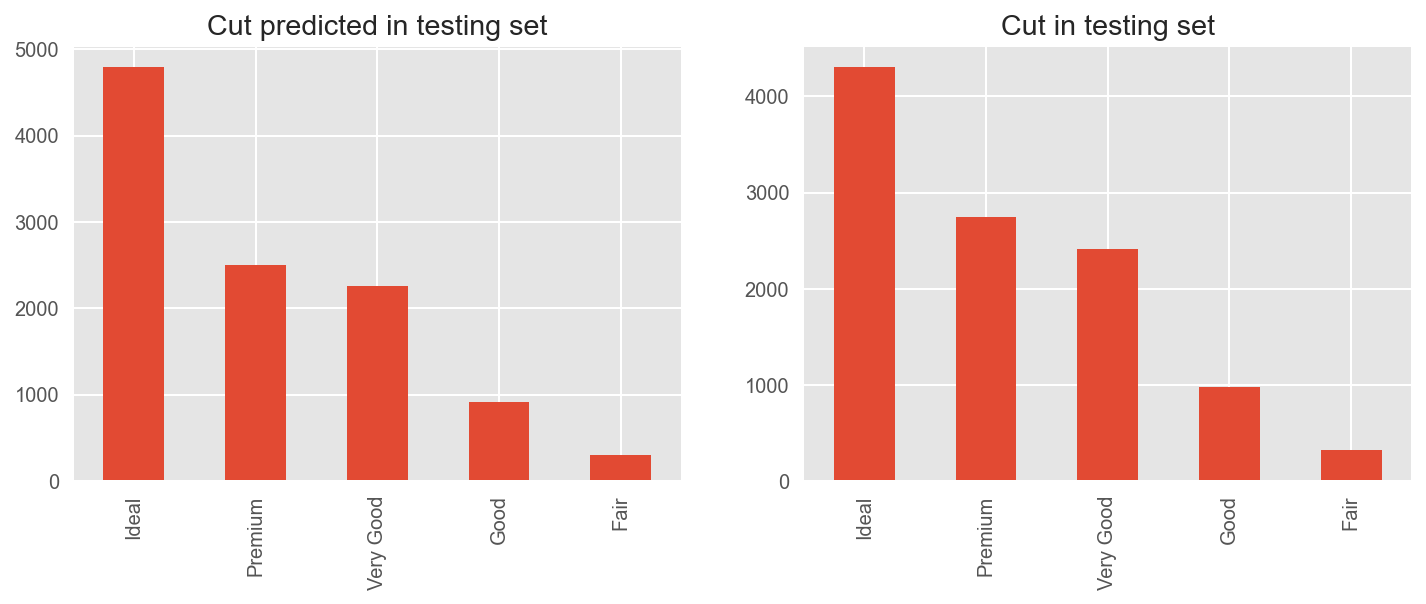

In [68]:
y_pred = xgb_clf.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['cut'])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
y_pred.cut.value_counts().plot(kind='bar');
plt.title('Cut predicted in training set')
plt.subplot(1,2,2)

y_test.to_frame().cut.value_counts().plot(kind='bar');
plt.title('Cut in testing set')
plt.show();

# Conclusions

- This data had a blend of both categorical and numerical data. In our feature selection process we choose to make use of `Domain Knowledge`, `EDA` and use a wrapper feature selection method called `RFE`. We used ` RFE` via `Random forests` to rank our features from best to worst and from then we chose from the top features what we believe would be predictive based on our domain knowledge. It is also important to mention that the reason we chose random forest is because random forest works well with both categorical and numerical data.

- Our response variable for this dataset was ordinal categorical, with two categories(Fair, Good) being ill-represented and for this reason we paid special attention to how we evaluate it, by emphasizing metrics such as `F1`,`Recall` and `precision` over other metrics.

- Our decision tree model performed very well ranking 2nd among our five models and if we compare it to the rest of the models, it is relatively easy to interpret.

- For all of our model building we considered different hyper-parameters to try to improve performance and used grid search to find the best combination.  

- To make our model selection we considered several factors. The first thing we considered was that we are dealing with a multiclass ordinal classification problem. The second thing we needed to consider was the context of diamonds and the high cost of misclassifications. (For example a poorly cut diamond classified as a well cut diamond or vise-versa.) For these reasons we decided to choose XGBoost as our preferred model,  since it has around 4% higher precision and a 2% higher F1-score.

# References

https://www.withclarity.com/education/diamond-education/diamond-carat

https://www.serendipitydiamonds.com/blog/how-to-measure-a-diamond/

https://www.withclarity.com/education/diamond-education/diamond-cut/what-is-diamond-depth-or-diamond-education

https://www.bluenile.com/education/diamonds/lengthtowidthratio

https://bmcgenet.biomedcentral.com/articles/10.1186/s12863-018-0633-8

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

https://xgboost.readthedocs.io/en/latest/parameter.html